Загрузим данные и необходимые библиотеки

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [158]:
!gdown --id 1plvZ7poGmKX2YWgEUyuaAkjcb7ZvNVS-

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1plvZ7poGmKX2YWgEUyuaAkjcb7ZvNVS-
To: /content/bank-test-case-ds.csv
100% 4.35M/4.35M [00:00<00:00, 208MB/s]


In [159]:
df = pd.read_csv('/content/bank-test-case-ds.csv', sep = ";")
df.head()

,closed_cred_sum,closed_creds,active_cred_sum_overdue,active_cred_sum,active_cred_day_overdue,active_cred_max_overdue,age,gender,region,first_loan,loan_cost_all,first_days_quant,month_income,order_date,cost_all,order_id,client_id,expert
0,143822.0,22,104.12,130068.80,8,756.09,31,0,36,10000.0,10000,196,0.0,2017-07-23,0.0,728319,320464,1
1,0.0,0,38151.93,46230.00,1492,38151.93,51,0,93,10000.0,10000,17,20000.0,2017-07-23,0.0,728321,320466,1
2,51356.0,2,3000.00,3000.00,8,3000.00,28,1,3,10000.0,10000,84,0.0,2017-07-23,0.0,728323,320467,1
3,0.0,0,22784.19,32103.52,913,22784.19,28,0,52,10000.0,10000,7,0.0,2017-07-23,0.0,728447,320533,1
4,12298.0,1,4942.95,4950.00,2883,4942.95,31,0,47,5000.0,5000,20,0.0,2017-07-23,0.0,728421,298598,1


Набор данных, содержащий следующие переменные
Переменные, характеризующие кредитную историю клиента
closed_cred_sum - сумма, которую клиент выплатил по ранее взятым и закрытым
кредитам  
closed_creds - количество закрытых кредитов  
active_cred_sum_overdue - суммарная задолженность по активным кредитам  
active_cred_sum - сумма всех активных кредитов  
active_cred_day_overdue - суммарная просрочка в днях по всем активным кредитам  
active_cred_max_overdue - максимальная сумма просроченной задолженности по
активным кредитам  
Переменные характеризующие клиента  
age - возраст  
gender - пол  
region - регион  
month_income - ежемесячный доход  
Переменные, характеризующие кредит, по которому нужно сделать
прогноз  
first_loan - сумма, которую клиент хочет получить в кредит (из заявки)  
first_days_quant - срок, на которую клиент хочет взять кредит  
loan_cost_all - одобренная клиенту сумма кредита  
order_date - дата подачи заявки на получение кредита  
cost_all - сумма всех выплат по одобренному кредиту  
order_id - id заявки  
client_id - id клиента  
Целевая переменная:  
expert - решение, которое принято по заявке (0 - одобрено, 1 - отклонено) 

# EDA 

In [160]:
df.dtypes


closed_cred_sum            float64
closed_creds                 int64
active_cred_sum_overdue    float64
active_cred_sum            float64
active_cred_day_overdue      int64
active_cred_max_overdue    float64
age                          int64
gender                       int64
region                       int64
first_loan                 float64
loan_cost_all                int64
first_days_quant             int64
month_income               float64
order_date                  object
cost_all                   float64
order_id                     int64
client_id                    int64
expert                       int64
dtype: object

In [161]:
df['order_date'] = pd.to_datetime(df["order_date"])
df["order_date"].dtypes

dtype('<M8[ns]')

In [162]:
df[['gender','region']] = df[['gender','region']].astype(str)

In [163]:
df.dtypes

closed_cred_sum                   float64
closed_creds                        int64
active_cred_sum_overdue           float64
active_cred_sum                   float64
active_cred_day_overdue             int64
active_cred_max_overdue           float64
age                                 int64
gender                             object
region                             object
first_loan                        float64
loan_cost_all                       int64
first_days_quant                    int64
month_income                      float64
order_date                 datetime64[ns]
cost_all                          float64
order_id                            int64
client_id                           int64
expert                              int64
dtype: object

Посмотрим на нашу целевую переменную - expert

In [164]:
df["expert"].value_counts(normalize = True)

1    0.749265
0    0.250735
Name: expert, dtype: float64

Как видим, выборка не очень сбалансирована, что довольно важно в нашей задаче классификации

Проверим отсутствующие значения

In [165]:
df.isna().mean()

closed_cred_sum            0.00000
closed_creds               0.00000
active_cred_sum_overdue    0.00000
active_cred_sum            0.00000
active_cred_day_overdue    0.00000
active_cred_max_overdue    0.00000
age                        0.00000
gender                     0.00000
region                     0.00000
first_loan                 0.00038
loan_cost_all              0.00000
first_days_quant           0.00000
month_income               0.00000
order_date                 0.00000
cost_all                   0.00000
order_id                   0.00000
client_id                  0.00000
expert                     0.00000
dtype: float64

Как видим, небольшое количество пропущенных значений есть только у параметра first_loan.

In [166]:
df['order_date'] = df['order_date'].apply(pd.Timestamp.toordinal)
df.fillna(0,inplace = True)


In [167]:
df.isna().mean()

closed_cred_sum            0.0
closed_creds               0.0
active_cred_sum_overdue    0.0
active_cred_sum            0.0
active_cred_day_overdue    0.0
active_cred_max_overdue    0.0
age                        0.0
gender                     0.0
region                     0.0
first_loan                 0.0
loan_cost_all              0.0
first_days_quant           0.0
month_income               0.0
order_date                 0.0
cost_all                   0.0
order_id                   0.0
client_id                  0.0
expert                     0.0
dtype: float64

In [168]:
df1 = df.copy()

In [169]:
#np.any(np.isna(df))

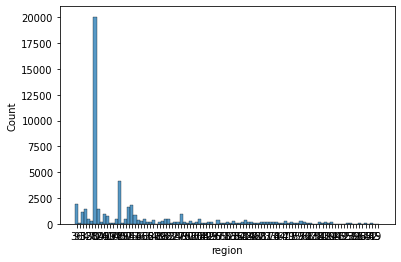

In [170]:
sns.histplot(df["region"])

gender и region являются категориальными признаками, причём видно, что среди параметра region преобладает параметр 0 (предположительно отсутствие региона)

In [171]:
categorical = ["gender","region"]

In [172]:
df["cost_all"].value_counts(normalize = True)

0.0        0.815124
1501.4     0.008520
2872.0     0.006580
4308.0     0.004860
2305.2     0.004760
             ...   
12666.5    0.000020
9273.0     0.000020
2123.2     0.000020
10794.0    0.000020
18907.9    0.000020
Name: cost_all, Length: 2561, dtype: float64

переменная cost_all  - это сумма выплат по уже одобренному кредиту, в нашем случае она бесполезна, аналогично с loan_cost_all

Сформируем список признаков для обучения модели.

In [173]:
features =  ['closed_cred_sum', 'closed_creds', 'active_cred_sum_overdue',
       'active_cred_sum', 'active_cred_day_overdue', 'active_cred_max_overdue',
       'age',  'first_loan',
       'first_days_quant', 'month_income',
        'client_id',
       'gender', 'region',
       ]

Из списка признаков также был исключён order_date, поскольку время обращения слабо связанo с решением по кредиту, в то же время client_id является существенным признаком ( во многом потому что представляет собой число, которое может показывать, как долго пользователь является клиентом компании и потому влиять на решение о предоставлении кредита)

In [174]:
df['client_cat'] = pd.qcut(df['client_id'],5,duplicates='drop')

In [175]:
df.groupby('client_cat')['expert'].agg(['mean','count'])

,mean,count
client_cat,,
"(108.999, 274066.0]",0.455954,10001
"(274066.0, 310588.0]",0.716700,10000
"(310588.0, 322138.0]",0.816000,10000
"(322138.0, 332110.0]",0.869500,10000
"(332110.0, 393528.0]",0.888200,10000


Как и говорилось выше, наблюдается тенденция, по которой чем старее клиент, тем меньше процент отказа.

In [176]:
cor_mat = df.corr()

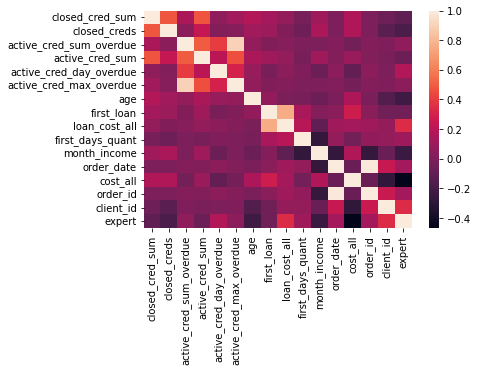

In [177]:
sns.heatmap(cor_mat)

In [178]:
df[['first_loan','loan_cost_all']].describe()

,first_loan,loan_cost_all
count,50001.000000,50001.000000
mean,7748.737025,6703.681926
std,5311.921767,4610.529844
min,0.000000,0.000000
25%,5000.000000,3000.000000
50%,7000.000000,7000.000000
75%,10000.000000,10000.000000
max,100000.000000,100000.000000


Посмотрим, как зависит выдача кредита от срока, на который этот кредит берётся.

In [179]:
df['term_cat'] = pd.qcut(df['first_days_quant'],5)
df.groupby('term_cat')['expert'].agg(['mean','count'])

,mean,count
term_cat,,
"(-0.001, 10.0]",0.775424,12606
"(10.0, 14.0]",0.782866,7447
"(14.0, 20.0]",0.654801,19131
"(20.0, 21.0]",0.983274,3647
"(21.0, 336.0]",0.801395,7170


Наибольший процент отклонений у людей, планирующих взять кредит на три недели, наименьший - на две.

In [180]:
df['income_cat'] = pd.qcut(df['month_income'],5,duplicates='drop')

In [181]:
df.groupby('income_cat')['expert'].agg(['mean','count'])

,mean,count
income_cat,,
"(-0.001, 20000.0]",0.863225,22972
"(20000.0, 35000.0]",0.684896,15817
"(35000.0, 50000.0]",0.601476,8401
"(50000.0, 550000.0]",0.621843,2811


Видим, что процент отказов сильно зависит от дохода клиента.

# Обучение модели


In [182]:
from sklearn.model_selection import train_test_split

In [183]:
X_train, X_test, y_train, y_test = train_test_split(
 df1[features], df1["expert"], test_size=0.33, random_state=42)

In [184]:
! pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [185]:
from catboost import CatBoostClassifier

In [186]:
model = CatBoostClassifier(verbose=100,
                           random_state=42,
                           learning_rate=0.5,
                           early_stopping_rounds=200,
                           eval_metric='AUC',
                           cat_features=categorical
                           )

In [187]:
model.fit(X_train,y_train,eval_set=(X_train,y_train))

0:	test: 0.8668431	best: 0.8668431 (0)	total: 32.6ms	remaining: 32.6s
100:	test: 0.9703985	best: 0.9703985 (100)	total: 2.96s	remaining: 26.4s
200:	test: 0.9838135	best: 0.9838135 (200)	total: 5.79s	remaining: 23s
300:	test: 0.9912683	best: 0.9912683 (300)	total: 9.57s	remaining: 22.2s
400:	test: 0.9951707	best: 0.9951707 (400)	total: 12.4s	remaining: 18.5s
500:	test: 0.9975048	best: 0.9975048 (500)	total: 15.2s	remaining: 15.1s
600:	test: 0.9987289	best: 0.9987289 (600)	total: 19.2s	remaining: 12.8s
700:	test: 0.9993483	best: 0.9993483 (700)	total: 23.4s	remaining: 9.96s
800:	test: 0.9996555	best: 0.9996555 (800)	total: 26.1s	remaining: 6.48s
900:	test: 0.9998309	best: 0.9998309 (900)	total: 28.9s	remaining: 3.17s
999:	test: 0.9998960	best: 0.9998960 (999)	total: 32.5s	remaining: 0us

bestTest = 0.9998960006
bestIteration = 999



In [188]:
prediction = model.predict(X_test)

Теперь проверим нашу разбалансированную выборку при помощи classification report

In [189]:
from sklearn.metrics import classification_report

In [190]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      4163
           1       0.93      0.94      0.94     12338

    accuracy                           0.91     16501
   macro avg       0.88      0.87      0.87     16501
weighted avg       0.91      0.91      0.91     16501



Посмотрим, сможем ли мы её улучшить

In [191]:
x = df1.drop("expert",axis = "columns")
y = df1["expert"]

In [192]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [193]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = "minority")
x_sm, y_sm = smote.fit_resample(x,y)
y_sm.value_counts()

1    37464
0    37464
Name: expert, dtype: int64

In [194]:
x_sm.dtypes

closed_cred_sum            float64
closed_creds                 int64
active_cred_sum_overdue    float64
active_cred_sum            float64
active_cred_day_overdue      int64
active_cred_max_overdue    float64
age                          int64
gender                      object
region                      object
first_loan                 float64
loan_cost_all                int64
first_days_quant             int64
month_income               float64
order_date                   int64
cost_all                   float64
order_id                     int64
client_id                    int64
dtype: object

In [195]:
x_sm[['gender','region']] = x_sm[['gender','region']].astype(str)
x_sm.dtypes

closed_cred_sum            float64
closed_creds                 int64
active_cred_sum_overdue    float64
active_cred_sum            float64
active_cred_day_overdue      int64
active_cred_max_overdue    float64
age                          int64
gender                      object
region                      object
first_loan                 float64
loan_cost_all                int64
first_days_quant             int64
month_income               float64
order_date                   int64
cost_all                   float64
order_id                     int64
client_id                    int64
dtype: object

In [196]:
X_train, X_test, y_train, y_test = train_test_split(
 x_sm, y_sm, test_size=0.33, random_state=42)


model.fit(X_train,y_train,eval_set=(X_train,y_train))

prediction = model.predict(X_test)

0:	test: 0.9828840	best: 0.9828840 (0)	total: 52.7ms	remaining: 52.7s
100:	test: 0.9997077	best: 0.9997077 (100)	total: 6.14s	remaining: 54.7s
200:	test: 0.9999321	best: 0.9999321 (200)	total: 10.7s	remaining: 42.5s
300:	test: 0.9999779	best: 0.9999779 (298)	total: 15.8s	remaining: 36.7s
400:	test: 0.9999846	best: 0.9999846 (398)	total: 19.7s	remaining: 29.5s
500:	test: 0.9999864	best: 0.9999865 (492)	total: 23.4s	remaining: 23.3s
600:	test: 0.9999883	best: 0.9999883 (559)	total: 27.8s	remaining: 18.4s
700:	test: 0.9999895	best: 0.9999895 (665)	total: 32.9s	remaining: 14s
800:	test: 0.9999899	best: 0.9999899 (789)	total: 41.4s	remaining: 10.3s
900:	test: 0.9999912	best: 0.9999912 (896)	total: 50.6s	remaining: 5.56s
999:	test: 0.9999922	best: 0.9999922 (947)	total: 55s	remaining: 0us

bestTest = 0.9999922052
bestIteration = 947

Shrink model to first 948 iterations.


In [197]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     12313
           1       0.99      1.00      0.99     12414

    accuracy                           0.99     24727
   macro avg       0.99      0.99      0.99     24727
weighted avg       0.99      0.99      0.99     24727



Как видим, после использования SMOTE показатели модели значительно улучшились.